In [359]:
# Importing dependencies 
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import datetime as dt

In [689]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc, text

In [361]:
# Creating engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [362]:
# Inspecting data
insp = inspect(engine)
insp.get_table_names()

['measurement', 'station']

In [363]:
# Inspecting data 
columns = insp.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [364]:
# Inspecting data 
columns = insp.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [365]:
# looking at first 10 rows 
engine.execute('SELECT * FROM  measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [366]:
# looking at first 10 rows 
engine.execute('SELECT * FROM  station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [452]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
_measurement = Base.classes.measurement
_station = Base.classes.station

In [368]:
# Start a session to query the database
session = Session(engine)

In [369]:
# how many dates are there 
session.query(func.count(_measurement.date)).all()

[(19550)]

In [370]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [371]:
# Finding the first data 
session.query(_measurement.date).order_by(_measurement.date).first()

('2010-01-01')

In [372]:
# Finding the latest Date
session.query(_measurement.date).order_by(_measurement.date.desc()).first()

('2017-08-23')

In [373]:
yearly = session.query(_measurement.date, _measurement.prcp).\
    filter(_measurement.date < '2017-08-24').\
    filter(_measurement.date > '2016-08-22').\
    order_by(_measurement.date).all()


yearly

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [374]:
# Checking to make sure first and last days are expected 
print(yearly[-1])

('2017-08-23', 0.45)


In [375]:
# Checking to make sure first and last days are expected 
print(yearly[0])

('2016-08-23', 0.0)


In [376]:
# Loading data into dataframe 
yearly_df = pd.DataFrame(yearly, columns =['date', 'precipitation'])

yearly_df 


,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [377]:
# dropped all rows with NaN values 
clean_yearly = yearly_df.dropna(how='any')
clean_yearly

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [378]:
# checking number of unique dates so after the adding of seperate precipitation records is complete we can verify there is the correct number of days. 
clean_yearly.nunique()

date             366
precipitation    160
dtype: int64

In [660]:
# grouping by date and adding the precipitation logs that are recorded on the same day producing a cumulative log of precipitation for each day. 

sum_yearly_by_date = clean_yearly.groupby('date')['precipitation'].sum()
sum_yearly_by_date

date
2016-08-23    2.71
2016-08-24    9.33
2016-08-25    0.54
2016-08-26    0.10
2016-08-27    0.32
              ... 
2017-08-19    0.09
2017-08-20    0.01
2017-08-21    0.58
2017-08-22    0.50
2017-08-23    0.53
Name: precipitation, Length: 366, dtype: float64

In [380]:
#Resetting index so we can set index to date column value
reset_yearly = sum_yearly_by_date.reset_index()

reset_yearly

,date,precipitation
0,2016-08-23,2.71
1,2016-08-24,9.33
2,2016-08-25,0.54
3,2016-08-26,0.10
4,2016-08-27,0.32
...,...,...
361,2017-08-19,0.09
362,2017-08-20,0.01
363,2017-08-21,0.58
364,2017-08-22,0.50


In [381]:
# Setting index to date column 

yearly_indexed_by_date = reset_yearly.set_index('date')
yearly_indexed_by_date

,precipitation
date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.58


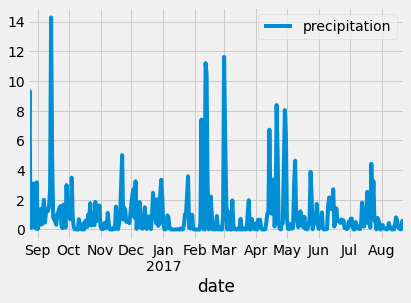

In [658]:
# Plot the results of daily precipitation
reset_yearly.date = pd.to_datetime(reset_yearly.date)
reset_yearly.plot(x = 'date', y = 'precipitation')



In [383]:
# summary statistics for the precipitation data.
yearly_indexed_by_date['precipitation'].describe()

count    366.000000
mean       0.978907
std        1.776349
min        0.000000
25%        0.052500
50%        0.405000
75%        1.087500
max       14.280000
Name: precipitation, dtype: float64

In [384]:
#######################
#Station Analysis
######################

# Calculating the total number of stations.
stations = session.query(_station.id).order_by(_station.id).all()
station_count = len(stations)
print(f'There are {station_count} stations')

There are 9 stations


In [544]:
# most active stations by observation counts

observtion_counts = session.\
    query(_station.name, func.count(_measurement.station).\
    label('totals')).\
    filter(_measurement.station == _station.station).\
    group_by(_measurement.station).\
    order_by(desc('totals')).\
    all()
observtion_counts


[('WAIHEE 837.5, HI US', 2772),
 ('WAIKIKI 717.2, HI US', 2724),
 ('KANEOHE 838.1, HI US', 2709),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('MANOA LYON ARBO 785.2, HI US', 2612),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('PEARL CITY, HI US', 1372),
 ('UPPER WAHIAWA 874.3, HI US', 511)]

In [568]:
# printing the station with the highest number of observations 
observtion_counts = session.\
    query(_station.name, func.count(_measurement.station).\
    label('totals')).\
    filter(_measurement.station == _station.station).\
    group_by(_measurement.station).\
    order_by(desc('totals')).\
    first()
print(f'The most active station is {observtion_counts[0]} with {observtion_counts[1]} recorded observations')

The most active station is WAIHEE 837.5, HI US with 2772 recorded observations


In [622]:
# printing the station with the highest number of observations 
highest_count_within_date = session.\
    query(_station.name, func.count(_measurement.station).\
    label('totals')).\
    filter(_measurement.station == _station.station).\
    filter(_measurement.date < '2017-08-24').\
    filter(_measurement.date > '2016-08-22').\
    group_by(_measurement.station).\
    order_by(desc('totals')).\
    first()
print(f'The most active station between 2017-08-24 and 2017-08-22 is {highest_count_within_date[0]} with {highest_count_within_date[1]} recorded observations')

The most active station between 2017-08-24 and 2017-08-22 is WAIKIKI 717.2, HI US with 361 recorded observations


In [623]:
# Retrieve the last 12 months of temperature observation data (TOBS) sorted by highest numbers of recorded observations. 
yearly_tobs = session.query(_station.name,_measurement.tobs, _measurement.date).\
    filter(_measurement.station == _station.station).\
    filter(_measurement.date < '2017-08-24').\
    filter(_measurement.date > '2016-08-22').\
    filter(_station.name == highest_count_within_date[0]).\
    all()
                            
pd_yearly_tobs = pd.DataFrame(yearly_tobs)
pd_yearly_tobs

,name,tobs,date
0,"WAIKIKI 717.2, HI US",81.0,2016-08-23
1,"WAIKIKI 717.2, HI US",79.0,2016-08-24
2,"WAIKIKI 717.2, HI US",80.0,2016-08-25
3,"WAIKIKI 717.2, HI US",79.0,2016-08-26
4,"WAIKIKI 717.2, HI US",77.0,2016-08-27
...,...,...,...
356,"WAIKIKI 717.2, HI US",79.0,2017-08-19
357,"WAIKIKI 717.2, HI US",81.0,2017-08-20
358,"WAIKIKI 717.2, HI US",81.0,2017-08-21
359,"WAIKIKI 717.2, HI US",82.0,2017-08-22


Text(0, 0.5, 'Frequency')

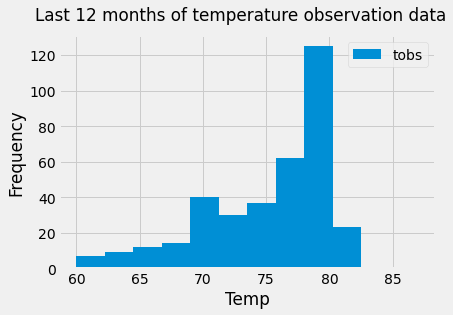

In [649]:
# Hist of last 12 months of temperature observation data using a bin size of 12 

pd_yearly_tobs.plot(kind='hist',subplots=True,sharex=True,sharey=True, bins = 12, title='Last 12 months of temperature observation data')
plt.xlabel("Temp")
plt.ylabel("Frequency")

In [716]:
#######################################
#BONUS
#####################################

#Identify the average temperature in June at all stations across all available years in the dataset.
tobs = session.query(func.avg(_measurement.tobs)).\
    filter(_measurement.date.contains('-06-')).\
    all()
print(f'The average temperature in June is: {tobs[0][0]}')

The average temperature in June is: 74.94411764705882


In [717]:
#Identify the average temperature in December at all stations across all available years in the dataset.

#Identify the average temperature in June at all stations across all available years in the dataset.
tobs = session.query(func.avg(_measurement.tobs)).\
    filter(_measurement.date.contains('-12-')).\
    all()
print(f'The average temperature in December is: {tobs[0][0]}')

The average temperature in December is: 71.04152933421226
